# Comparative Analysis of PCA, t-SNE, and UMAP

## Introduction

Dimensionality reduction is a crucial technique in data science and machine learning. This document compares three widely used algorithms:

* **PCA**: Principal Component Analysis
* **t-SNE**: t-distributed Stochastic Neighbor Embedding
* **UMAP**: Uniform Manifold Approximation and Projection

We will explore their **mathematical foundations**, **visual outputs**, and **pros and cons**.

## 1. Principal Component Analysis (PCA)

### Description

PCA is a linear dimensionality reduction method that projects data onto orthogonal components capturing the most variance.

### Mathematical Foundation

Let $X \in \mathbb{R}^{n \times d}$ be the data matrix.

1. Center the data:

   $$
   \tilde{X} = X - \mu, \quad \text{where } \mu = \frac{1}{n} \sum_{i=1}^{n} X_i
   $$

2. Compute the covariance matrix:

   $$
   \Sigma = \frac{1}{n} \tilde{X}^T \tilde{X}
   $$

3. Perform eigendecomposition:

   $$
   \Sigma v_i = \lambda_i v_i
   $$

   Retain the top $k$ eigenvectors $v_1, \ldots, v_k$.

4. Project:

   $$
   X_{\text{PCA}} = \tilde{X} V_k
   $$

### Pros and Cons

| Pros                       | Cons                         |
| -------------------------- | ---------------------------- |
| Fast, interpretable        | Linear only                  |
| Preserves global structure | Sensitive to feature scaling |

## 2. t-distributed Stochastic Neighbor Embedding (t-SNE)

### Description

t-SNE focuses on preserving **local structure** using a probabilistic model.

### Mathematical Foundation

Given pairwise distances $d_{ij}$ in high-dimensional space:

1. Compute conditional probabilities:

   $$
   p_{j|i} = \frac{\exp(-\|x_i - x_j\|^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\|x_i - x_k\|^2 / 2\sigma_i^2)}
   $$

   Symmetrize:

   $$
   p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n}
   $$

2. Define low-dimensional similarities using Student t-distribution:

   $$
   q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l} (1 + \|y_k - y_l\|^2)^{-1}}
   $$

3. Minimize the Kullback–Leibler divergence:

   $$
   KL(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
   $$

### Pros and Cons

| Pros                         | Cons                                  |
| ---------------------------- | ------------------------------------- |
| Excellent cluster separation | Poor global structure                 |
| Captures local neighborhoods | Slow on large datasets                |
| Visual appeal                | Non-parametric (no inverse transform) |

## 3. Uniform Manifold Approximation and Projection (UMAP)

### Description

UMAP is a **non-linear dimensionality reduction** technique based on **manifold learning** and **topology**.  
It constructs a **topological representation of the high-dimensional data** and then optimizes a low-dimensional embedding that preserves both local and global structures.

UMAP is particularly useful for visualizing high-dimensional data while preserving neighborhood relationships, and it is often faster and more scalable than t-SNE.

### Mathematical Foundation

UMAP can be rigorously understood in terms of **fuzzy topological representations** and **graph theory**. The method consists of three main steps:

#### Step 1: Construct the High-Dimensional Graph

1. For each data point $x_i \in \mathbb{R}^d$, compute its $k$ nearest neighbors in the dataset using a distance metric $d(x_i, x_j)$ (often Euclidean).  

2. Define a **local connectivity distance** $\rho_i$ for each point, typically the distance to its closest neighbor, to ensure that every point has at least one neighbor within a minimum distance:

   $$
   \rho_i = \min_{j} d(x_i, x_j)
   $$

3. Define a **local scaling parameter** $\sigma_i$ to control the smoothness of the neighborhood distribution for each point. This is usually determined numerically to satisfy a target entropy:

   $$
   \sum_{j} \exp\left(-\frac{\max(0, d(x_i, x_j) - \rho_i)}{\sigma_i}\right) = \text{constant}
   $$

4. Construct the **high-dimensional edge weights** using a **fuzzy membership function**:

   $$
   p_{ij} = \exp\left( -\frac{\max(0, d(x_i, x_j) - \rho_i)}{\sigma_i} \right)
   $$

   - $p_{ij} \in [0, 1]$ represents the **fuzzy probability** that points $x_i$ and $x_j$ are connected in the manifold.  
   - This yields a **weighted k-NN graph**, which encodes the local structure of the data.

5. Symmetrize the graph to ensure undirected edges:

   $$
   p_{ij}^{\text{sym}} = p_{ij} + p_{ji} - p_{ij} p_{ji}
   $$

#### Step 2: Construct a Fuzzy Simplicial Set in Low Dimensions

1. Let $y_i \in \mathbb{R}^r$ denote the low-dimensional embedding of $x_i$.  

2. Define a **low-dimensional fuzzy similarity** $q_{ij}$ using a differentiable function that decays with distance (often a heavy-tailed distribution to allow separation):

   $$
   q_{ij} = \frac{1}{1 + a \|y_i - y_j\|^{2b}}
   $$

   - $a, b > 0$ are parameters fit to approximate a smooth decay similar to the high-dimensional space.  
   - $q_{ij}$ is also interpreted as the probability that $y_i$ and $y_j$ are connected in the low-dimensional embedding.

#### Step 3: Optimize the Low-Dimensional Embedding

UMAP minimizes a **cross-entropy loss** between the high-dimensional and low-dimensional fuzzy simplicial sets:

$$
C = \sum_{i \neq j} \Big[ p_{ij}^{\text{sym}} \log \frac{p_{ij}^{\text{sym}}}{q_{ij}} + (1 - p_{ij}^{\text{sym}}) \log \frac{1 - p_{ij}^{\text{sym}}}{1 - q_{ij}} \Big]
$$

- This encourages **edges present in high dimensions** (large $p_{ij}$) to be close in the low-dimensional embedding ($q_{ij}$ large) and **non-edges** to be far apart.  
- Gradient descent (usually stochastic) is used to optimize $y_i$ for all $i$.

### Key Properties

1. UMAP preserves **local neighborhood structure** while retaining some **global relationships**.  
2. Faster and more scalable than t-SNE for large datasets.  
3. Embeddings are relatively consistent across runs due to graph construction.  
4. Can be applied to **new points** via the learned transformation (unlike t-SNE).

### Summary

UMAP is rigorously grounded in **manifold learning and topological data analysis**.  
- High-dimensional data is represented as a **fuzzy simplicial set**.  
- Low-dimensional embeddings are optimized to **minimize cross-entropy** with the high-dimensional structure.  
- The result is a compact, informative low-dimensional representation that preserves neighborhood relations and global structure.


### Pros and Cons

| Pros                        | Cons                         |
| --------------------------- | ---------------------------- |
| Fast and scalable           | Sensitive to hyperparameters |
| Retains global + local info | Can distort distances        |
| Can transform new points    | More complex implementation  |

## Conclusion

| Method | Local Structure | Global Structure | Transform New Data | Speed | Use Cases                    |
| ------ | --------------- | ---------------- | ------------------ | ----- | ---------------------------- |
| PCA    | No              | Yes              | Yes                | Yes   | Preprocessing                |
| t-SNE  | Yes             | No               | No                 | No    | Visualization                |
| UMAP   | Yes             | Partial          | Yes                | Yes   | Visualization, preprocessing |


# Example of Dimensionality Reduction

**Objective:**  
Visualize high-dimensional data (64 features) in 2D using three techniques:

* **PCA (Principal Component Analysis)**
* **t-SNE (t-Distributed Stochastic Neighbor Embedding)**
* **UMAP (Uniform Manifold Approximation and Projection)**

**Dataset:**

* `load_digits()` from `sklearn.datasets`
* Contains 1,797 images of handwritten digits (0–9), each an 8x8 image (64-dimensional)

### PCA (Principal Component Analysis)

**Method:**

* Linear transformation
* Projects data onto directions (principal components) that maximize variance

**Output Characteristics:**

* Fast and deterministic
* Captures global structure
* Often useful as a preprocessing step

**Visualization Insight:**

* Clear clusters, but overlap exists
* Not ideal for preserving local relationships

### t-SNE (t-Distributed Stochastic Neighbor Embedding)

**Method:**

* Non-linear technique
* Focuses on preserving **local similarity**
* Computes probabilities of similarity and minimizes divergence between high- and low-dimensional spaces

**Output Characteristics:**

* More separation between digit clusters
* Computationally intensive
* Results can vary between runs (stochastic)

**Visualization Insight:**

* Better at separating digit classes than PCA
* More expressive for local neighborhood structures

### UMAP (Uniform Manifold Approximation and Projection)

**Method:**

* Non-linear dimensionality reduction
* Preserves both local and some global structures
* Based on manifold learning and nearest-neighbor graphs

**Output Characteristics:**

* Faster than t-SNE
* More consistent than t-SNE across runs
* Preserves more of the data's structure

**Visualization Insight:**

* Strong separation between digit classes
* Compact clusters with meaningful relationships

### Combined Visualization

**Graph Summary:**

* **Left:** PCA – captures global structure, some overlaps  
* **Middle:** t-SNE – excellent local clustering  
* **Right:** UMAP – good balance of local/global structure, fast and accurate  

**Conclusion:**

* **PCA:** Good first step, linear  
* **t-SNE:** Great local structure, slower  
* **UMAP:** Best of both worlds – speed and clarity


/Users/robed/Documents/compass-consulting/.conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/robed/Documents/compass-consulting/.conda/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


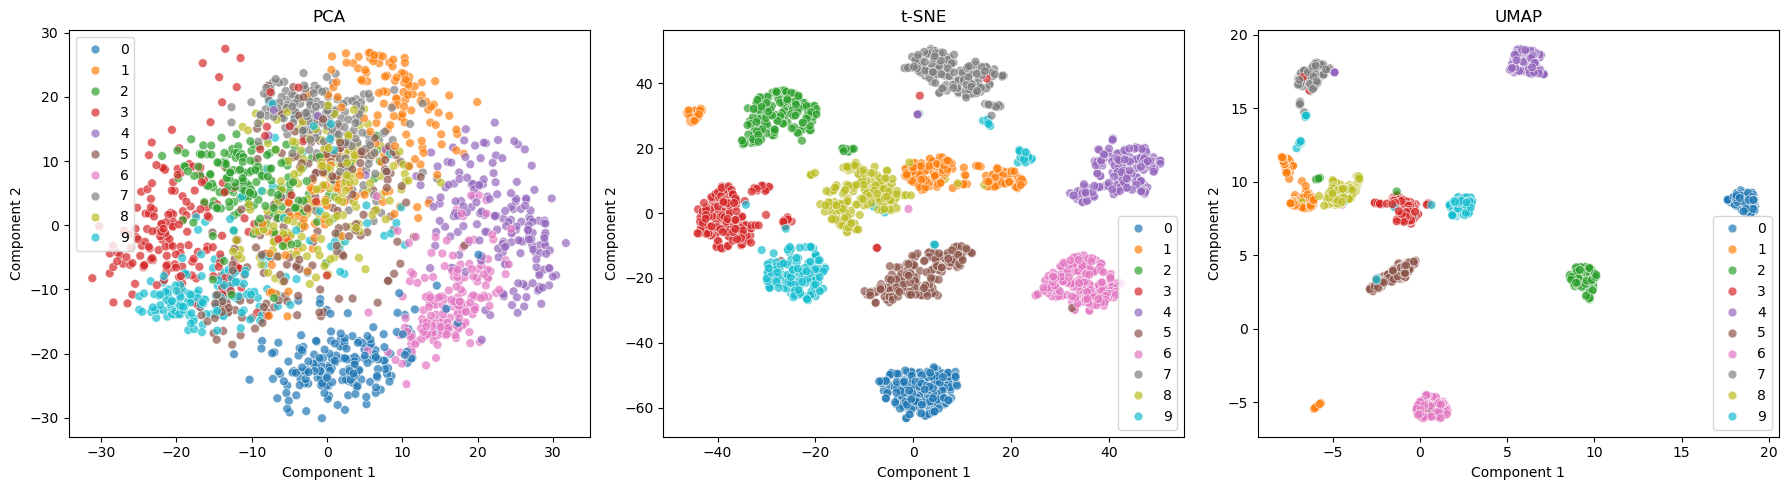

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


# Load dataset: 8x8 images of digits (64-dimensional)
digits = load_digits()
X = digits.data
y = digits.target

# --- Dimensionality Reduction ---

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# --- Plotting ---
plt.figure(figsize=(18, 5))

embeddings = [X_pca, X_tsne, X_umap]
titles = ['PCA', 't-SNE', 'UMAP']

for i, (X_embedded, title) in enumerate(zip(embeddings, titles), 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(
        x=X_embedded[:, 0],
        y=X_embedded[:, 1],
        hue=y,
        palette='tab10',
        s=40,
        alpha=0.7,
        legend='full'  # show legend for classes
    )
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

plt.tight_layout()
plt.show()
